In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
sess=tf.InteractiveSession()
x  =tf.placeholder(tf.float32,shape=[None,784]) #28*28
y_ =tf.placeholder(tf.float32,shape=[None,10])
W  =tf.Variable(tf.zeros([784,10]),tf.float32)
b  =tf.Variable(tf.zeros([10]),tf.float32)

sess.run( tf.initialize_all_variables() )

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [3]:
y=tf.nn.softmax( tf.matmul(x,W)+b )
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [4]:
for i in range(1000):
    batch=mnist.train.next_batch(50)
    train_step.run(feed_dict={x:batch[0], y_:batch[1]})

In [5]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.arg_max(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
acc=accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels})*100
print ("Accuracy of the ANN is {}".format(acc) )

Instructions for updating:
Use `tf.math.argmax` instead
Accuracy of the ANN is 91.14999771118164


In [6]:
#sess.close()

In [7]:
batch

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0.,

In [8]:
import numpy as np

In [9]:
i=2
img=np.reshape(batch[0][i],[28,28])
y_t=batch[1][i]
print(y_t)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
print(W.eval().max())
saver = tf.train.Saver()
save_path = saver.save(sess,"model05.ckpt")
print("Model saved in path: %s" % save_path)
sess.close()

0.78498834
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Model saved in path: model05.ckpt


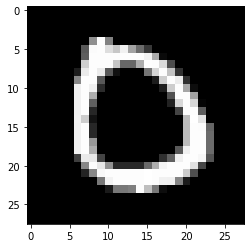

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img,cmap="gray")

In [12]:
with tf.Session() as sess:
    saver.restore(sess,"model05.ckpt")
    print("Model restored.")
    print("w : %s", W.eval())

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model05.ckpt
Model restored.
w : %s [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
with tf.Session() as sess:
    saver.restore(sess,"model05.ckpt")
    print("Model restored.")
    print("b : %s", b.eval())

INFO:tensorflow:Restoring parameters from model05.ckpt
Model restored.
b : %s [-0.35020587  0.3535061   0.06523243 -0.23537984  0.00165866  1.3563004
 -0.07486758  0.60596716 -1.4538459  -0.2683623 ]
